In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error


In [3]:
!unzip /content/Krupnie_goroda-RF_1985-2019_187_09.12.21.zip

Archive:  /content/Krupnie_goroda-RF_1985-2019_187_09.12.21.zip
   creating: Krupnie_goroda-RF_1985-2019_187_09.12.21/
  inflating: Krupnie_goroda-RF_1985-2019_187_09.12.21/data.csv  
  inflating: Krupnie_goroda-RF_1985-2019_187_09.12.21/meta.csv  
  inflating: Krupnie_goroda-RF_1985-2019_187_09.12.21/structure.csv  


Сведения по 70 базовым социально-экономическим показателям для более 200 крупных российских городов за 1985, 1990-1991, 1995-2019 гг. Публикуются как официальная статистическая информация в ежегодных статистических сборниках Росстата. В ходе подготовки датасета эти сведения были спарсены и преобразованы в панельные данные в машиночитаемом формате.

Единица наблюдения в датасете — город РФ за конкретный год. Данные для каждого наблюдения приведены по следующим атрибутам: регион, муниципальное образование, ОКТМО, город, координаты, год, показатель - например «число зарегистрированных преступлений», «число родившихся на 1000 человек населения», «ввод в действие основных фондов», и т.д.

In [5]:
df = pd.read_csv('/content/Krupnie_goroda-RF_1985-2019_187_09.12.21/data.csv', sep = ';')
df.head()


,region,municipality,settlement,oktmo,latitude_dd,longitude_dd,year,assets,assets_depreciation,assets_exhausted,...,retail_growth,rni,schools,servises,volume_electr,volume_manufact,volume_mining,volume_water,wage,workers
0,Алтайский край,Барнаул,Барнаул,1701000001,53.348056,83.78,1985,NaN,NaN,NaN,...,NaN,6.6,91.0,0.147,NaN,NaN,NaN,NaN,0.213,353.8
1,Алтайский край,Барнаул,Барнаул,1701000001,53.348056,83.78,1990,NaN,NaN,NaN,...,NaN,2.9,99.0,0.208,NaN,NaN,NaN,NaN,0.296,336.7
2,Алтайский край,Барнаул,Барнаул,1701000001,53.348056,83.78,1995,NaN,NaN,NaN,...,NaN,-6.1,107.0,432.600,NaN,NaN,NaN,NaN,440.000,269.5
3,Алтайский край,Барнаул,Барнаул,1701000001,53.348056,83.78,1996,NaN,NaN,NaN,...,NaN,-6.2,107.0,694.600,NaN,NaN,NaN,NaN,756.500,262.8
4,Алтайский край,Барнаул,Барнаул,1701000001,53.348056,83.78,1997,NaN,NaN,NaN,...,NaN,-4.9,108.0,1035.400,NaN,NaN,NaN,NaN,889.900,257.6


In [8]:
meta = pd.read_csv('/content/Krupnie_goroda-RF_1985-2019_187_09.12.21/meta.csv')
meta


,property,value
0,standardversion,NaN
1,identifier,ANO CPUR/АНО ЦПУР
2,title,NaN
3,description,Сведения по 70 базовым социально-экономическим...
4,creator,Росстат
5,created,NaN
6,modified,NaN
7,subject,NaN
8,format,"CSV (кодировка: «UTF-8», разделитель: «;»)"
9,provenance,NaN


In [9]:
structure = pd.read_csv('/content/Krupnie_goroda-RF_1985-2019_187_09.12.21/structure.csv')
structure

,field name,english description,russian description,measure,okei_code,format
0,region,NaN,Наименование субъекта Российской ФедерацииНапр...,,,string
1,municipality,NaN,Наименование муниципального образованияНаприме...,,,string
2,settlement,NaN,"Наименование населенного пунктаНапример, «Белг...",,,string
3,oktmo,NaN,Значение кода ОКТМО для населенного пункта.Код...,,,string
4,latitude_dd,NaN,Широта населенного пункта в современном формат...,градусы,2355,numeric
...,...,...,...,...,...,...
72,volume_manufact,NaN,Объем отгруженных товаров собственного произво...,миллион рублей,385,numeric
73,volume_mining,NaN,Объем отгруженных товаров собственного произво...,миллион рублей,385,numeric
74,volume_water,NaN,Объем отгруженных товаров собственного произво...,миллион рублей,385,numeric
75,wage,NaN,Среднемесячная номинальная начисленная заработ...,рублей,383,numeric


Нас интересуют данные по городам Сибири за период с 1985 по 2019

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4109 entries, 0 to 4108
Data columns (total 77 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   region                4109 non-null   object 
 1   municipality          4109 non-null   object 
 2   settlement            4109 non-null   object 
 3   oktmo                 4109 non-null   int64  
 4   latitude_dd           4109 non-null   float64
 5   longitude_dd          4109 non-null   float64
 6   year                  4109 non-null   int64  
 7   assets                2134 non-null   float64
 8   assets_depreciation   2134 non-null   float64
 9   assets_exhausted      2130 non-null   float64
 10  assets_new            1790 non-null   float64
 11  birth                 4104 non-null   float64
 12  build_flat            3133 non-null   float64
 13  catering              4017 non-null   float64
 14  catering_growth       2715 non-null   float64
 15  collective_foreign   

In [10]:
df.isnull().sum()

,0
region,0
municipality,0
settlement,0
oktmo,0
latitude_dd,0
...,...
volume_manufact,1408
volume_mining,2768
volume_water,3525
wage,11


In [13]:
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent

,0
region,0.000000
municipality,0.000000
settlement,0.000000
oktmo,0.000000
latitude_dd,0.000000
...,...
volume_manufact,34.266245
volume_mining,67.364322
volume_water,85.787296
wage,0.267705


уберем все столбцы где более 30 % пропусков

In [12]:
threshold_percentage = 0.7
min_non_null_count = int(len(df) * threshold_percentage)
df_cleaned = df.dropna(axis=1, thresh=min_non_null_count)
print("\nDataFrame after dropping columns with many nulls (based on percentage):")
df_cleaned.head()


DataFrame after dropping columns with many nulls (based on percentage):


,region,municipality,settlement,oktmo,latitude_dd,longitude_dd,year,birth,build_flat,catering,...,pop_work,pop_young,population,preschool,preschool_child,preschool_places,retail,rni,wage,workers
0,Алтайский край,Барнаул,Барнаул,1701000001,53.348056,83.78,1985,16.0,NaN,0.107,...,NaN,NaN,637.1,195.0,36.4,30.4,NaN,6.6,0.213,353.8
1,Алтайский край,Барнаул,Барнаул,1701000001,53.348056,83.78,1990,12.1,NaN,0.130,...,NaN,NaN,662.3,226.0,35.8,25.2,NaN,2.9,0.296,336.7
2,Алтайский край,Барнаул,Барнаул,1701000001,53.348056,83.78,1995,7.9,NaN,76.200,...,NaN,NaN,653.8,185.0,24.0,24.7,NaN,-6.1,440.000,269.5
3,Алтайский край,Барнаул,Барнаул,1701000001,53.348056,83.78,1996,7.6,NaN,111.000,...,NaN,NaN,651.5,172.0,21.9,23.8,NaN,-6.2,756.500,262.8
4,Алтайский край,Барнаул,Барнаул,1701000001,53.348056,83.78,1997,7.6,NaN,134.000,...,NaN,NaN,651.7,166.0,20.8,22.8,NaN,-4.9,889.900,257.6


In [14]:
df_cleaned.columns

Index(['region', 'municipality', 'settlement', 'oktmo', 'latitude_dd',
       'longitude_dd', 'year', 'birth', 'build_flat', 'catering',
       'construction', 'crimes', 'criminals', 'death', 'doctors',
       'doctors_per10', 'hospital_beds', 'hospital_beds_per10', 'hospitals',
       'invest_budg', 'invest_fed', 'investment', 'living_space',
       'n_companies', 'new_hospital_beds', 'new_housing', 'new_polycl_visits',
       'new_preschool_places', 'new_school_places', 'nurses', 'nurses_per10',
       'pens', 'pension', 'polycl_visits', 'polycl_visits_per10', 'polyclinic',
       'pop_1_6', 'pop_old', 'pop_work', 'pop_young', 'population',
       'preschool', 'preschool_child', 'preschool_places', 'retail', 'rni',
       'wage', 'workers'],
      dtype='object')

In [15]:
structure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   field name           77 non-null     object 
 1   english description  0 non-null      float64
 2   russian description  77 non-null     object 
 3   measure              77 non-null     object 
 4   okei_code            77 non-null     object 
 5   format               77 non-null     object 
dtypes: float64(1), object(5)
memory usage: 3.7+ KB


In [18]:
structure[structure['field name'].isin(list(df_cleaned.columns))]

,field name,english description,russian description,measure,okei_code,format
0,region,NaN,Наименование субъекта Российской ФедерацииНапр...,,,string
1,municipality,NaN,Наименование муниципального образованияНаприме...,,,string
2,settlement,NaN,"Наименование населенного пунктаНапример, «Белг...",,,string
3,oktmo,NaN,Значение кода ОКТМО для населенного пункта.Код...,,,string
4,latitude_dd,NaN,Широта населенного пункта в современном формат...,градусы,2355,numeric
5,longitude_dd,NaN,Долгота населенного пункта в современном форма...,градусы,2355,numeric
6,year,NaN,Год,,,integer
11,birth,NaN,Число родившихся на 1000 человек населения,,,numeric
12,build_flat,NaN,Ввод в действие объектов социально-культурного...,квартира,909,integer
13,catering,NaN,Оборот общественного питания (в фактически дей...,миллион рублей,385,numeric


для анализа берем

wage - Среднемесячная номинальная начисленная зарплата

year - года

retail Оборот розничной торговли

population - численность населения

pens - количество пенсионеров, тыс.

n_companies - Число предприятий и организаций (на конец года...

crimes - количество преступлений

region


settlement







Чтобы определить, находитесь ли вы в Сибири, нужно сравнить ваши географические координаты с диапазонами широты и долготы для этого региона: северная широта в пределах примерно 45° - 75° и восточная долгота примерно 50° - 120°. Точное определение зависит от конкретного места, так как Сибирь охватывает огромную территорию, но эти диапазоны дают хорошее представление.

In [20]:
df.latitude_dd.describe()

,latitude_dd
count,4109.000000
mean,53.809870
std,5.712674
min,42.057778
25%,51.485556
50%,54.700000
75%,56.363611
max,69.405556


In [19]:
df.longitude_dd.describe()

,longitude_dd
count,4109.000000
mean,59.716452
std,30.211920
min,20.450000
25%,39.723056
50%,47.504722
75%,68.253889
max,177.514722


In [23]:
df_sib = df.loc[ (df.longitude_dd >= 50.0) & (df.longitude_dd <= 120.0)         \
              & (df.latitude_dd  >= 45.0)    &  (df.latitude_dd  <= 75.0)  ,                        \
 ['year','region','settlement','wage','retail','population','pens','n_companies']]
df_sib.head()

,year,region,settlement,wage,retail,population,pens,n_companies
0,1985,Алтайский край,Барнаул,0.213,NaN,637.1,112.1,NaN
1,1990,Алтайский край,Барнаул,0.296,NaN,662.3,123.7,NaN
2,1995,Алтайский край,Барнаул,440.000,NaN,653.8,146.4,12908.0
3,1996,Алтайский край,Барнаул,756.500,NaN,651.5,150.0,14330.0
4,1997,Алтайский край,Барнаул,889.900,NaN,651.7,153.2,15229.0


In [24]:
df_sib['year'].value_counts()

,count
year,
2001,74
2000,74
2003,69
2002,69
2004,66
2005,66
2006,63
2007,63
2011,63


берем данные с 1995 года

In [25]:
df_sib = df_sib[df_sib.year >=1995 ]
df_sib.isnull().sum()

,0
year,0
region,0
settlement,0
wage,0
retail,58
population,0
pens,23
n_companies,3


In [27]:
df_small = df_sib.groupby('year')[['population','wage']].mean().reset_index()
df_small.head()

,year,population,wage
0,1995,555.403704,635.933333
1,1996,555.414815,1084.722222
2,1997,555.881481,1320.703704
3,1998,556.062963,1487.814815
4,1999,553.714815,2001.807407


/tmp/ipython-input-3673943605.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


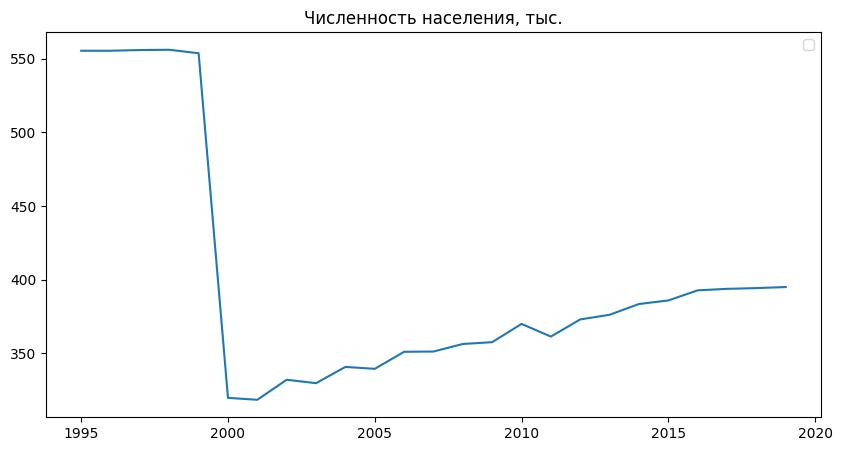

In [28]:
# Посмотрим на график
plt.figure(figsize=(10,5))
plt.plot(df_small["year"], df_small["population"])
plt.legend()
plt.title("Численность населения, тыс.")
plt.show()

/tmp/ipython-input-2738783673.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


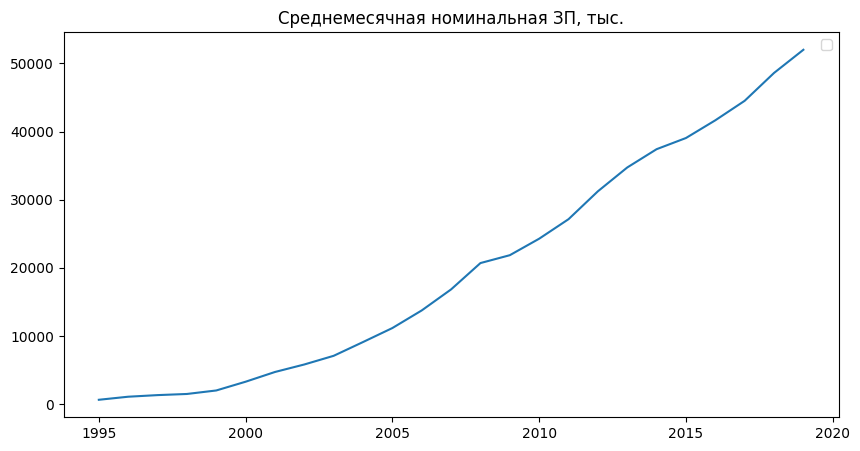

In [29]:
# Посмотрим на график
plt.figure(figsize=(10,5))
plt.plot(df_small["year"], df_small["wage"])
plt.legend()
plt.title("Среднемесячная номинальная ЗП, тыс.")
plt.show()

попробуем предсказать номинальную зарплату в сибирских городах на 10 лет вперед , то есть до 2030 года

In [32]:
pip install prophet

In [33]:
from prophet import Prophet

In [45]:
df_salary = df_small[['year','wage']]

In [46]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    25 non-null     int64  
 1   wage    25 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [48]:
df_salary['date'] = df_salary['year'].astype(str) +'-01-01'
df_salary.head()

,year,wage,date
0,1995,635.933333,1995-01-01
1,1996,1084.722222,1996-01-01
2,1997,1320.703704,1997-01-01
3,1998,1487.814815,1998-01-01
4,1999,2001.807407,1999-01-01


In [49]:
df_salary['date'] = pd.to_datetime(df_salary['date'] )
df_salary.head()

,year,wage,date
0,1995,635.933333,1995-01-01
1,1996,1084.722222,1996-01-01
2,1997,1320.703704,1997-01-01
3,1998,1487.814815,1998-01-01
4,1999,2001.807407,1999-01-01


In [50]:
df_salary = df_salary.drop('year', axis = 1)
df_salary

,wage,date
0,635.933333,1995-01-01
1,1084.722222,1996-01-01
2,1320.703704,1997-01-01
3,1487.814815,1998-01-01
4,2001.807407,1999-01-01
5,3287.185135,2000-01-01
6,4715.097297,2001-01-01
7,5817.233333,2002-01-01
8,7089.726087,2003-01-01
9,9110.731818,2004-01-01


In [51]:
df_salary.columns = ['y','ds']
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       25 non-null     float64       
 1   ds      25 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 532.0 bytes


In [53]:
df_salary

,y,ds
0,635.933333,1995-01-01
1,1084.722222,1996-01-01
2,1320.703704,1997-01-01
3,1487.814815,1998-01-01
4,2001.807407,1999-01-01
5,3287.185135,2000-01-01
6,4715.097297,2001-01-01
7,5817.233333,2002-01-01
8,7089.726087,2003-01-01
9,9110.731818,2004-01-01


In [55]:
!pip uninstall prophet pystan
!pip install prophet

Found existing installation: prophet 1.1.7
Uninstalling prophet-1.1.7:
  Would remove:
    /usr/local/lib/python3.12/dist-packages/prophet-1.1.7.dist-info/*
    /usr/local/lib/python3.12/dist-packages/prophet.libs/libtbb-ff323302.so.2
    /usr/local/lib/python3.12/dist-packages/prophet.libs/libtbbmalloc-4dcb68e3.so.2
    /usr/local/lib/python3.12/dist-packages/prophet/*
Proceed (Y/n)? y
  Successfully uninstalled prophet-1.1.7
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 78.1 MB/s eta 0:00:00


In [56]:
pip install --upgrade pystan

  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached httpstan-4.13.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pysimdjson-6.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached crashtest-0.3.1-py3-none-any.whl.metadata (748 bytes)
  Using cached pastel-0.2.1-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl.metadata (2.3 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached marshmallow-3.26.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached webargs-8.7.1-py3-none-any.whl.metadata (6.7 kB)
Using cached pystan-3.10.0-py3-none-any.whl (13 kB)
Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
Using cached httpstan-4.13.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (45.6 MB)
Using cached pysimdjson-6.0.2-cp312-cp312-ma

In [57]:
# 2. Create and fit the Prophet model
m = Prophet()
m.fit(df_salary)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.


In [62]:
# 3. Create a future DataFrame for predictions
# This will generate a DataFrame with future dates for which you want to forecast.
future = m.make_future_dataframe(periods=10,freq = 'YE') # Forecast for the next 7 days

# 4. Make predictions
forecast = m.predict(future)


In [63]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1995-01-01,6194.312888,-638.808703,823.235445,6194.312888,6194.312888,-6110.176861,-6110.176861,-6110.176861,-6110.176861,-6110.176861,-6110.176861,0.0,0.0,0.0,84.136028
1,1996-01-01,6774.333655,156.706334,1522.075474,6774.333655,6774.333655,-5893.600695,-5893.600695,-5893.600695,-5893.600695,-5893.600695,-5893.600695,0.0,0.0,0.0,880.732960
2,1997-01-01,7355.943518,511.050691,1893.264850,7355.943518,7355.943518,-6145.661782,-6145.661782,-6145.661782,-6145.661782,-6145.661782,-6145.661782,0.0,0.0,0.0,1210.281736
3,1998-01-01,7935.964286,1063.398301,2458.309540,7935.964286,7935.964286,-6194.184636,-6194.184636,-6194.184636,-6194.184636,-6194.184636,-6194.184636,0.0,0.0,0.0,1741.779650
4,1999-01-01,8516.066209,1769.843363,3160.711985,8516.066209,8516.066209,-6110.176861,-6110.176861,-6110.176861,-6110.176861,-6110.176861,-6110.176861,0.0,0.0,0.0,2405.889348
5,2000-01-01,9596.363987,3014.311995,4370.286359,9596.363987,9596.363987,-5893.600695,-5893.600695,-5893.600695,-5893.600695,-5893.600695,-5893.600695,0.0,0.0,0.0,3702.763291
6,2001-01-01,10681.746997,3861.033641,5255.132151,10681.746997,10681.746997,-6145.661782,-6145.661782,-6145.661782,-6145.661782,-6145.661782,-6145.661782,0.0,0.0,0.0,4536.085215
7,2002-01-01,11954.532498,5016.217194,6469.188131,11954.532498,11954.532498,-6194.184636,-6194.184636,-6194.184636,-6194.184636,-6194.184636,-6194.184636,0.0,0.0,0.0,5760.347861
8,2003-01-01,13228.323761,6428.638915,7804.021157,13228.323761,13228.323761,-6110.176861,-6110.176861,-6110.176861,-6110.176861,-6110.176861,-6110.176861,0.0,0.0,0.0,7118.146900
9,2004-01-01,14881.644621,8284.557603,9660.281868,14881.644621,14881.644621,-5893.600695,-5893.600695,-5893.600695,-5893.600695,-5893.600695,-5893.600695,0.0,0.0,0.0,8988.043926


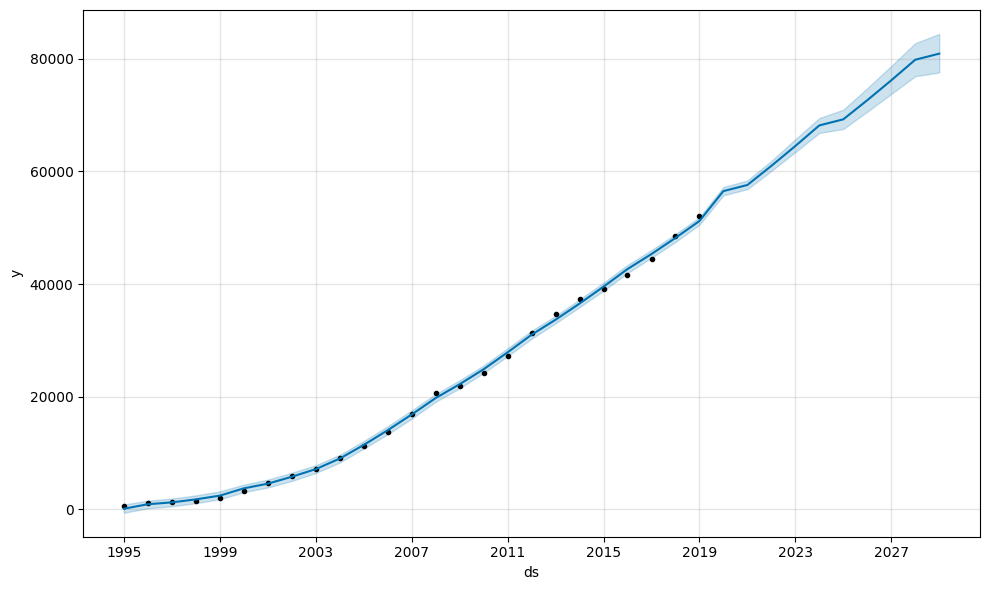

In [64]:
# 5. Visualize the forecast (optional)
fig = m.plot(forecast)

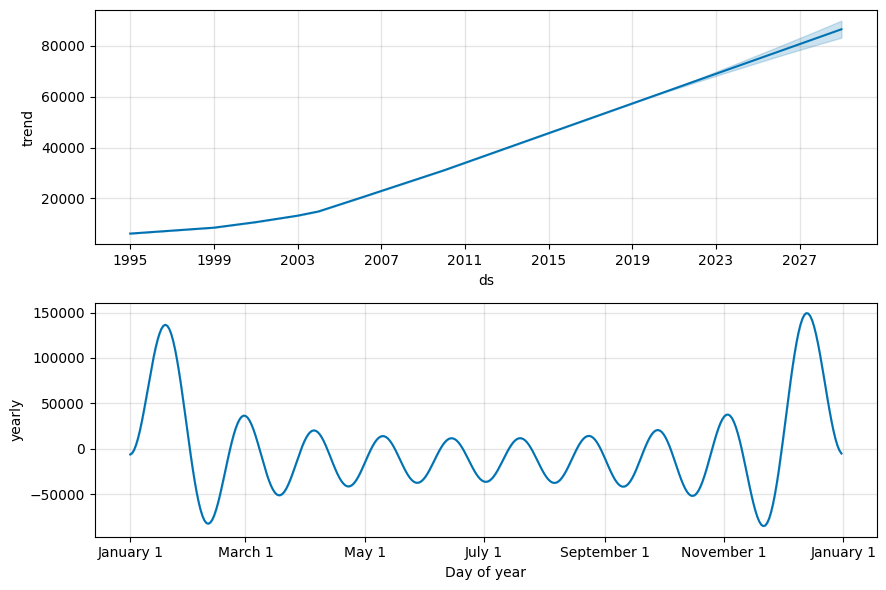

In [65]:
# You can also plot components like trend, yearly seasonality, etc.
fig_components = m.plot_components(forecast)